### Experiment 2: Quantile prediction with IID data

We consider an iid data sequence, where each entry is uniformly sampled from the interval [0,1]. The goal is to demonstrate that the OGD baseline does not generate nested confidence sets. That is, the score threshold prediction corresponding to larger quantile levels is not ncessarily larger. Along the way we test other algorithms as well. Our algorithm overcomes this limitation. 

First, we initialize the experiments. 

In [9]:
import sys
sys.path.append('./src')

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'lines.linewidth': 3})

from BayesianQuantile import BayesianQuantilePredictor
from Baselines import EmpiricalQuantilePredictor, MultiOGD, MultiMVP

T = 50
rng = np.random.default_rng(2024)
data = rng.random(T)

confidence_1 = 0.5
confidence_2 = 0.55

The following experiment shows that the OGD baseline does not generate nested confidence sets. The orange line needs to be always above the blue line. 

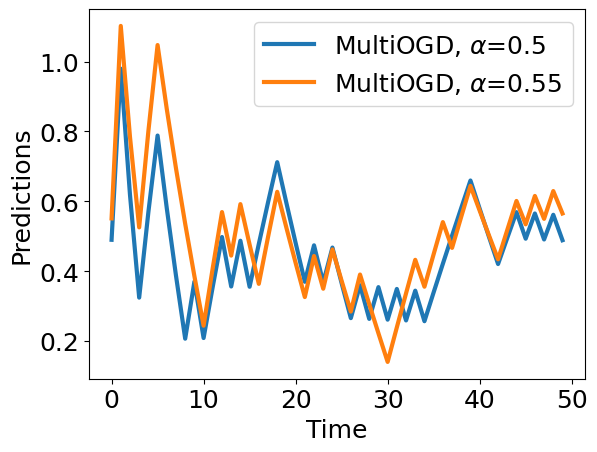

In [10]:
myOGD = MultiOGD()
predictions_ogd_1 = np.zeros(T)
predictions_ogd_2 = np.zeros(T)
for t in range(T):
    predictions_ogd_1[t] = myOGD.output(confidence_1)
    predictions_ogd_2[t] = myOGD.output(confidence_2)
    myOGD.update(data[t])

plt.plot(predictions_ogd_1, label=rf'MultiOGD, $\alpha$={confidence_1}')
plt.plot(predictions_ogd_2, label=rf'MultiOGD, $\alpha$={confidence_2}')
plt.legend(loc="upper right")
plt.xlabel('Time')
plt.ylabel('Predictions')

plt.savefig(f"Figures/nested_OGD_{int(confidence_1 * 100)}.pdf", bbox_inches='tight')
plt.show()

In contrast, we run our algorithm on the same problem. It can be seen that the nested property holds, and furthermore, the predictions are proper (lie within the domain [0,1]).

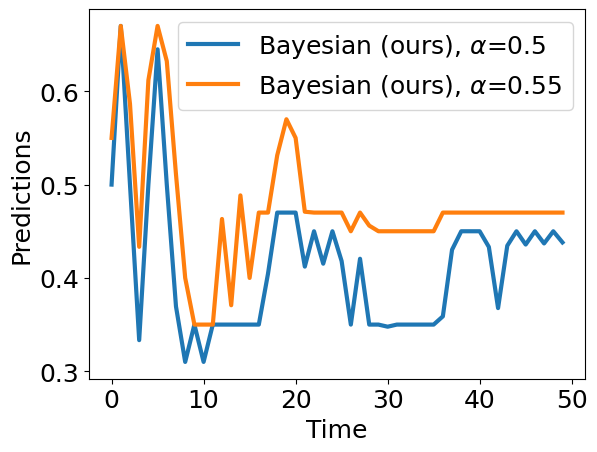

In [11]:
myBayesian = BayesianQuantilePredictor(exact=False)
predictions_bayesian_1 = np.zeros(T)
predictions_bayesian_2 = np.zeros(T)
for t in range(T):
    predictions_bayesian_1[t] = myBayesian.output(confidence_1)
    predictions_bayesian_2[t] = myBayesian.output(confidence_2)
    myBayesian.update(data[t])

plt.plot(predictions_bayesian_1, label=rf'Bayesian (ours), $\alpha$={confidence_1}')
plt.plot(predictions_bayesian_2, label=rf'Bayesian (ours), $\alpha$={confidence_2}')
plt.legend(loc="upper right")
plt.xlabel('Time')
plt.ylabel('Predictions')

plt.savefig(f"Figures/nested_bayesian_{int(confidence_1 * 100)}.pdf", bbox_inches='tight')
plt.show()

ERM enjoy the same benefit. 

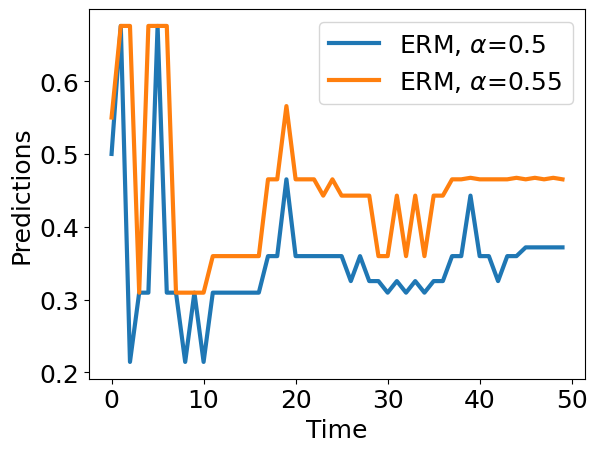

In [12]:
myEmpirical = EmpiricalQuantilePredictor()
predictions_empirical_1 = np.zeros(T)
predictions_empirical_2 = np.zeros(T)
for t in range(T):
    predictions_empirical_1[t] = myEmpirical.output(confidence_1)
    predictions_empirical_2[t] = myEmpirical.output(confidence_2)
    myEmpirical.update(data[t])

plt.plot(predictions_empirical_1, label=rf'ERM, $\alpha$={confidence_1}')
plt.plot(predictions_empirical_2, label=rf'ERM, $\alpha$={confidence_2}')
plt.legend(loc="upper right")
plt.xlabel('Time')
plt.ylabel('Predictions')

plt.savefig(f"Figures/nested_ERM_{int(confidence_1 * 100)}.pdf", bbox_inches='tight')
plt.show()

Finally, we test the MVP algorithm from (Bastani et al., 2022). We follow the implementation and the suggested usage from the original codebase maintained by the authors. It also suffers from the issue of not being nested. We note that MVP is randomized, and we only demonstrate a single seed that shows the problem exists. 

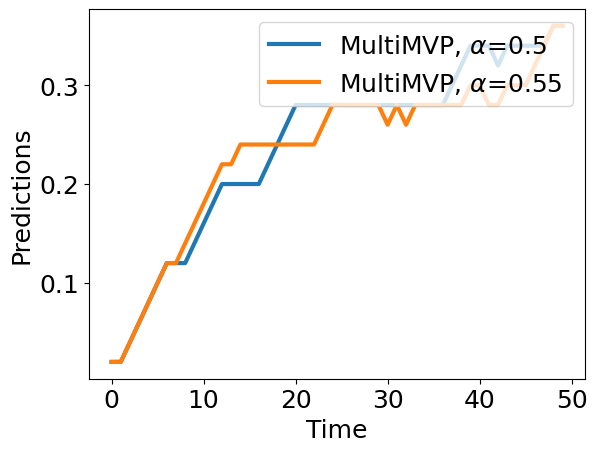

In [13]:
def all_points(x):
    return True

basic_group = [all_points]
num_groups = len(basic_group)

n_buckets = 50
K_e = 2.12
eta_MVP = np.sqrt(np.log(num_groups * n_buckets) / (2 * K_e * num_groups * n_buckets))

myMVP = MultiMVP(groups=basic_group, eta=eta_MVP, seed=7)

predictions_mvp_1 = np.zeros(T)
predictions_mvp_2 = np.zeros(T)
for t in range(T):
    predictions_mvp_1[t] = myMVP.output(t, confidence_1)
    predictions_mvp_2[t] = myMVP.output(t, confidence_2)
    myMVP.update(t, data[t])

plt.plot(predictions_mvp_1, label=rf'MultiMVP, $\alpha$={confidence_1}')
plt.plot(predictions_mvp_2, label=rf'MultiMVP, $\alpha$={confidence_2}')
plt.legend(loc="upper right")
plt.xlabel('Time')
plt.ylabel('Predictions')

plt.savefig(f"Figures/nested_MVP_{int(confidence_1 * 100)}.pdf", bbox_inches='tight')
plt.show()